In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

Here, we load the previous dataset.

In [1]:
df = pd.read_csv('502.txt',delimiter="\t",error_bad_lines=False,low_memory=False)

<IPython.core.display.Javascript object>

In [93]:
df.head()

,agency_cd,site_no,datetime,tz_cd,176923_00065,176923_00065_cd,176924_00060,176924_00060_cd
0,5s,15s,20d,6s,14n,10s,14n,10s
1,USGS,02146800,2007-10-01 01:00,EDT,4.68,A,97.8,A
2,USGS,02146800,2007-10-01 01:15,EDT,4.69,A,98.6,A
3,USGS,02146800,2007-10-01 01:30,EDT,4.69,A,98.6,A
4,USGS,02146800,2007-10-01 01:45,EDT,4.69,A,98.6,A


Now, we load the new dataset which we use to map with the previous one to get meaningful insights about the most prominent region of facilities that releases hightest amount of chemical. Here, the region is mapped and verified from the previous dataset.

In [4]:
df1 = pd.read_excel("year_wise_industry_water_release.xlsx")

<IPython.core.display.Javascript object>

In [5]:
df1.head()

,Facility,Year,Media Type,Chemical,Releases (lbs)
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Methanol,1513299.26
1,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Hydrochloric acid,193000.00
2,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Ammonia,166659.00
3,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Sulfuric acid,103000.00
4,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Acetaldehyde,84174.30


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42194 entries, 0 to 42193
Data columns (total 5 columns):
Facility          42194 non-null object
Year              42194 non-null int64
Media Type        42194 non-null object
Chemical          42194 non-null object
Releases (lbs)    42194 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.6+ MB


In [7]:
df1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDA51B7AC8>,
      dtype=object)

In [8]:
df1["Facility"].value_counts()

GIANT CEMENT CO-29448GNTCMPOBOX                                            1446
HOLCIM (US) INC HOLLY HILL PLANT-29059SNTCMSCHWY                           1127
INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNTKAMIN                         790
INTERNATIONAL PAPER CO EASTOVER MILL-29044NNCMPROUTE                        758
NEW-INDY CATAWBA LLC-29704BWTRC5300C                                        687
SI GROUP INC-29116THYLCCANNO                                                680
CROSS GENERATING STATION-29436CRSSG553CR                                    634
KAPSTONE PAPER & PACKAGING CORP-29411WSTVC5600A                             583
WESTROCK CP LLC-29502STNCNOLDGE                                             550
WINYAH GENERATING STATION-29440WNYHG661ST                                   505
DOMINION ENERGY SOUTH CAROLINA - WATEREE STATION-29044STHCR142WA            485
DOMTAR PAPER CO-29512WLLMTHWY91                                             478
US DOE SAVANNAH RIVER OPS-29802SDSVNSCHW

In [9]:
#df_facility = df1["Facility"].value_counts() > 490

In [10]:
df1["Facility"].str.strip()

0        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
1        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
2        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
3        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
4        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
5        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
6        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
7        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
8        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
9        INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
10       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
11       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
12       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
13       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
14       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
15       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...
16       INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT.

In [94]:
df1.head()

,Facility,Year,Media Type,Chemical,Releases (lbs),Region
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Methanol,1513299,Georgetown
1,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Hydrochloric acid,193000,Catawba
2,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Ammonia,166659,Florence
3,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Sulfuric acid,103000,Columbia
4,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Acetaldehyde,84174,Orangeburg


Initializing the process of obtaining top 7 facilities.

In [95]:
df2 = df1.groupby(["Facility"]).sum()
df2.head()

,Year,Releases (lbs)
Facility,,
250 - KERSHAW OILSEEDS-29067RCHRD413NH,78480,1784930
3G MERMET-29330MRMTW597NM,58384,67309
3M CO-GREENVILLE-29606MCMPNPERIM,223212,1233436
3V SIGMA USA-29440VCHMCPENNY,505293,6514539
A O SMITH WATER PRODUCTS CO-29101SMTHWUSHWY,60390,380297


In [13]:
df2 = df2.nlargest(10,"Releases (lbs)")

In [14]:
df2.to_csv('region.csv', sep=',')

In [16]:
heatmap_df1 = pd.pivot_table(df1, values='Releases (lbs)', 
                     index=['Facility'], 
                     columns='Year')

<IPython.core.display.Javascript object>

In [17]:
# [["GIANT CEMENT CO-29448GNTCMPOBOX", "HOLCIM (US) INC HOLLY HILL PLANT-29059SNTCMSCHWY", "INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNTKAMIN","INTERNATIONAL PAPER CO EASTOVER MILL-29044NNCMPROUTE", "NEW-INDY CATAWBA LLC-29704BWTRC5300C", "SI GROUP INC-29116THYLCCANNO","CROSS GENERATING STATION-29436CRSSG553CR", "KAPSTONE PAPER & PACKAGING CORP-29411WSTVC5600A","WESTROCK CP LLC-29502STNCNOLDGE",
# "WINYAH GENERATING STATION-29440WNYHG661ST"]]

<IPython.core.display.Javascript object>

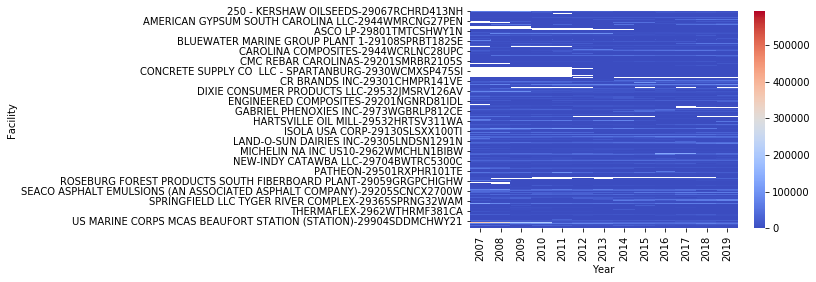

In [18]:
# Releases wrt facitlity and years.

sns.heatmap(heatmap_df1, cmap="coolwarm")

In [19]:
df1["Releases (lbs)"] = df1["Releases (lbs)"].astype(int)

In [97]:
df1

,Facility,Year,Media Type,Chemical,Releases (lbs),Region
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Methanol,1513299,Georgetown
1,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Hydrochloric acid,193000,Catawba
2,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Ammonia,166659,Florence
3,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Sulfuric acid,103000,Columbia
4,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Acetaldehyde,84174,Orangeburg
5,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Chloromethane,65204,Pineville
6,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Zinc and zinc compounds,31100,Ehrhardt
7,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Formaldehyde,22993,NaN
8,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Chlorine dioxide,11800,NaN
9,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Phenol,10332,NaN


In [21]:
df3 = pd.read_csv("C:/Users/mundl/Downloads/region (1).csv")

<IPython.core.display.Javascript object>

# Top 7 regions 

In [22]:
# Top 7 Regions and Companies with largest releases of chemicals causing water pollution.

df3

,Facility,Region,Releases (lbs)
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,Georgetown,32115915.47
1,NEW-INDY CATAWBA LLC-29704BWTRC5300C,Catawba,25709985.82
2,WESTROCK CP LLC-29502STNCNOLDGE,Florence,25001780.84
3,KAPSTONE PAPER & PACKAGING CORP-29411WSTVC5600A,Columbia,22727297.00
4,SI GROUP INC-29116THYLCCANNO,Orangeburg,22623680.66
5,CROSS GENERATING STATION-29436CRSSG553CR,Pineville,18205081.06
6,US DOE SAVANNAH RIVER OPS-29802SDSVNSCHWY,Ehrhardt,18155430.59


In [23]:
# Converting the float releases to integer format.

df3["Releases (lbs)"] = df3["Releases (lbs)"].astype(int)

# Visualization

<IPython.core.display.Javascript object>

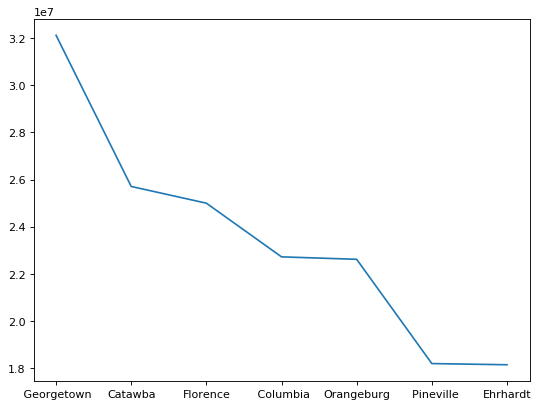

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot("Region", "Releases (lbs)", data=df3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

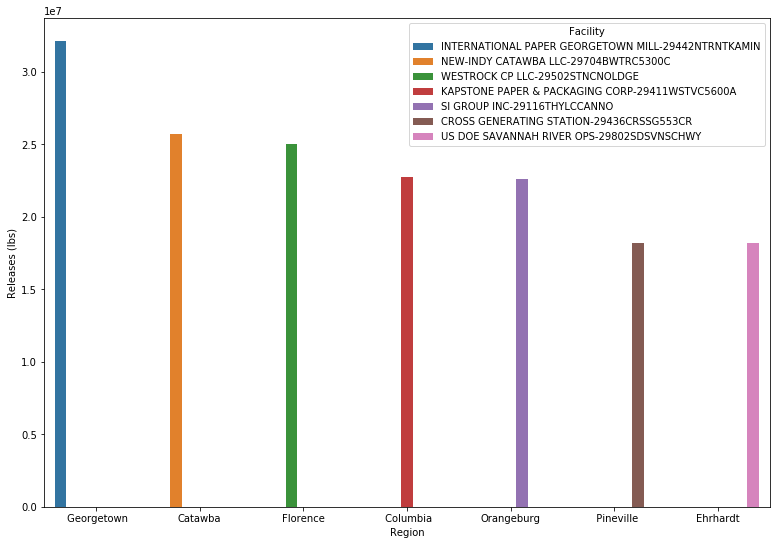

In [27]:
fig_dims = (13, 9)

fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x="Region", y="Releases (lbs)", data=df3, hue = "Facility")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

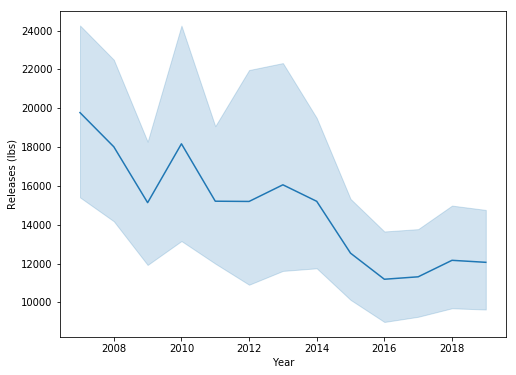

In [28]:
fig_dims = (8, 6)

fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(data=df1, x="Year", y="Releases (lbs)")

Joining the years column from the new dataset again to get the structured data

In [29]:
df4 = pd.read_csv("C:/Users/mundl/Downloads/region (1).csv")

<IPython.core.display.Javascript object>

In [30]:
years = df1["Year"]
df4 = df4.join(years)

In [31]:
# Top 7 Facilities with highest releases of chemicals.

df4

,Facility,Region,Releases (lbs),Year
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,Georgetown,32115915.47,2007
1,NEW-INDY CATAWBA LLC-29704BWTRC5300C,Catawba,25709985.82,2007
2,WESTROCK CP LLC-29502STNCNOLDGE,Florence,25001780.84,2007
3,KAPSTONE PAPER & PACKAGING CORP-29411WSTVC5600A,Columbia,22727297.00,2007
4,SI GROUP INC-29116THYLCCANNO,Orangeburg,22623680.66,2007
5,CROSS GENERATING STATION-29436CRSSG553CR,Pineville,18205081.06,2007
6,US DOE SAVANNAH RIVER OPS-29802SDSVNSCHWY,Ehrhardt,18155430.59,2007


In [32]:
Regions = df3["Region"]
df1 = df1.join(Regions)

In [99]:
df1.head()

,Facility,Year,Media Type,Chemical,Releases (lbs),Region
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Methanol,1513299,Georgetown
1,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Hydrochloric acid,193000,Catawba
2,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Ammonia,166659,Florence
3,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Sulfuric acid,103000,Columbia
4,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Acetaldehyde,84174,Orangeburg


# Creating a Merged dataframe 

Below is the merged dataframe which consists of a "Region" attribute added in the current dataset of facilities mapped according to the codes from the previous dataset which was in ".out" format

In [34]:
df1.to_csv('Merged.csv') 

In [35]:
df_main = pd.read_csv("Merged.csv")

<IPython.core.display.Javascript object>

In [37]:
del df_main["Unnamed: 0"]

In [ ]:
# fig_dims = (13, 9)

# fig, ax = plt.subplots(figsize=fig_dims)

# sns.barplot(x="Region", y="Releases (lbs)", data=df_main, hue = "Facility")

In [38]:
df_main["Facility"].value_counts().sum()

42194

In [39]:
df_main["Region"].value_counts().sum()

7

In [41]:
# del df_main["Unnamed: 7"]
# del df_main["Unnamed: 8"]

In [42]:
df_main.head()

,Facility,Year,Media Type,Chemical,Releases (lbs),Region
0,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Methanol,1513299,Georgetown
1,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Hydrochloric acid,193000,Catawba
2,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Ammonia,166659,Florence
3,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Sulfuric acid,103000,Columbia
4,INTERNATIONAL PAPER GEORGETOWN MILL-29442NTRNT...,2007,Air,Acetaldehyde,84174,Orangeburg


In [43]:
df_main.isnull().sum() / df_main.shape[0]

Facility          0.000000
Year              0.000000
Media Type        0.000000
Chemical          0.000000
Releases (lbs)    0.000000
Region            0.999834
dtype: float64

In [ ]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

# plt.plot("Region", "Releases (lbs)", data=df_main)  0+n  

In [62]:
chemicals = df_main.Chemical.value_counts().loc[lambda x : x>1000].to_frame()

In [63]:
chemicals

,Chemical
Lead and lead compounds,4114
Copper and copper compounds,2454
Zinc and zinc compounds,2146
Manganese and manganese compounds,2118
Chromium and chromium compounds,1955
Nickel and nickel compounds,1890
Methanol,1554
Ammonia,1362


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

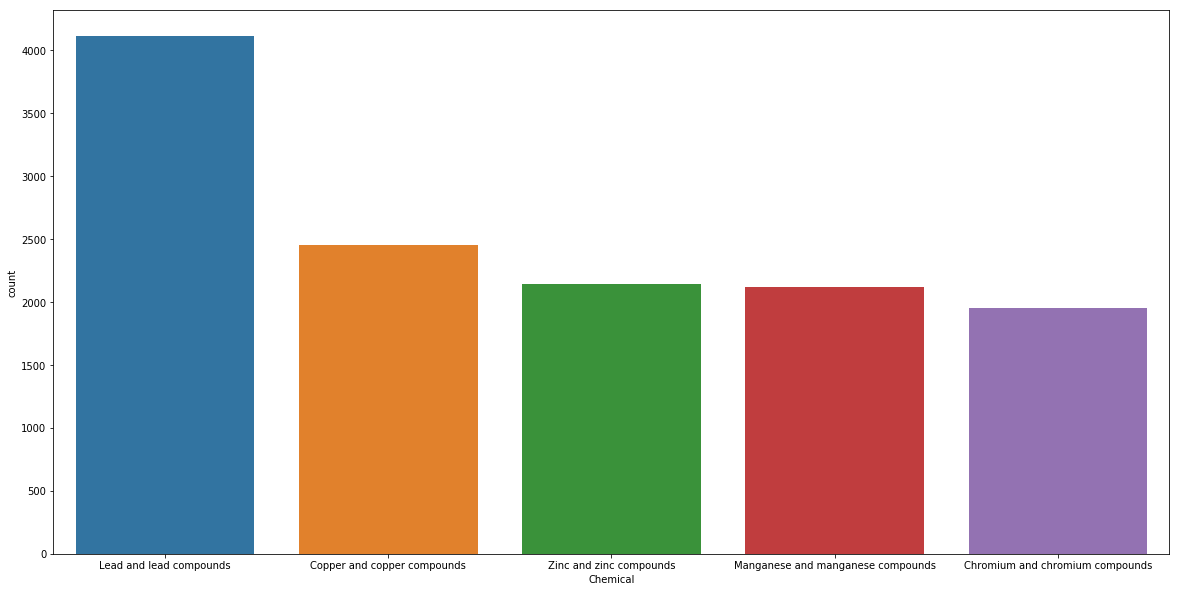

In [82]:
fig_dims = (20, 10)

fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(x='Chemical',data=df_main,order=pd.value_counts(df_main['Chemical']).iloc[:5].index)